In [2]:
#import packages
import numpy as np
from numpy import linalg as LA
import math as m
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import time


In [3]:
n = 5
m = 3

# Generate random matrix X of shape (n, m)
X = np.random.rand(n, m)

# SVD of X with full matrices
U, S, VT = np.linalg.svd(X, full_matrices=True)
print("Full SVD:")
print("U matrix:\n", U)
print("S values:\n", S)
print("VT matrix:\n", VT)  # Note: VT is the transpose of V

# Economy SVD of X
Uec, Sec, VTec = np.linalg.svd(X, full_matrices=False)
print("\nEconomy SVD:")
print("U matrix:\n", Uec)
print("S values:\n", Sec)
print("VT matrix:\n", VTec)

# Check results: X_ij = U_ik * S_kl * VT_lj

# Slow alternative for constructing diagonal matrix from S values
#S_matrix = np.zeros((n, m))
#for i in range(m):
#    S_matrix[i, i] = S[i]
# Fast alternative
S_matrix = np.zeros((n, m))
S_matrix[:m, :m] = np.diag(S)

print(S_matrix,' SS')
 
# Compute X_ij = U_ik * S_kl * VT_lj, alternative 1 (slow)
start_time = time.perf_counter()


res = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        for k in range(np.size(U, 1)):
            for l in range(np.size(S_matrix, 1)):
                res[i, j] += U[i, k] * S_matrix[k, l] * VT[l, j]
cpu_time1 = time.perf_counter()-start_time

# Alternative 2: Compute X_ij using matrix multiplication
print("\nComparison using matrix multiplication:")
print("Difference 1 (manual computation):", X - res)
print("Difference 2 (matrix multiplication):", X - U @ S_matrix @ VT)
start_time = time.perf_counter()
res2=U @ S_matrix @ VT
cpu_time2 = time.perf_counter()-start_time

# Alternative 3: Compute X_ij using einsum
start_time = time.perf_counter()
result_einsum = np.einsum('ik,kl,lj', U, S_matrix, VT)
cpu_time3 =time.perf_counter()-start_time
print("\nComparison using einsum:")
print("Difference 3:", X - result_einsum)

print(f'comparison cpu times: {cpu_time1}, {cpu_time2}, {cpu_time3}')



Full SVD:
U matrix:
 [[-0.59682103 -0.16049858  0.24008809 -0.74841942  0.0164604 ]
 [-0.45407941  0.53288778 -0.11621971  0.19565646 -0.67679689]
 [-0.53756362 -0.61609163 -0.35504466  0.44835569  0.06615832]
 [-0.17082395 -0.04164886  0.88392133  0.4299045   0.05431169]
 [-0.34563143  0.55584827 -0.14655056  0.12548393  0.73099134]]
S values:
 [2.28442634 0.84388715 0.1846604 ]
VT matrix:
 [[-0.71689027 -0.48767053 -0.4982427 ]
 [ 0.00156371  0.71352166 -0.70063143]
 [-0.69718426  0.50305496  0.51075416]]

Economy SVD:
U matrix:
 [[-0.59682103 -0.16049858  0.24008809]
 [-0.45407941  0.53288778 -0.11621971]
 [-0.53756362 -0.61609163 -0.35504466]
 [-0.17082395 -0.04164886  0.88392133]
 [-0.34563143  0.55584827 -0.14655056]]
S values:
 [2.28442634 0.84388715 0.1846604 ]
VT matrix:
 [[-0.71689027 -0.48767053 -0.4982427 ]
 [ 0.00156371  0.71352166 -0.70063143]
 [-0.69718426  0.50305496  0.51075416]]
[[2.28442634 0.         0.        ]
 [0.         0.84388715 0.        ]
 [0.         0.   

### Example how to find the main pattern of the data (de-noising)


Economy SVD:
S values:
 [45.86633551  0.66461698  0.62876265  0.60357504  0.58699852  0.58154021
  0.57060168  0.54656544  0.52266836  0.50999727]


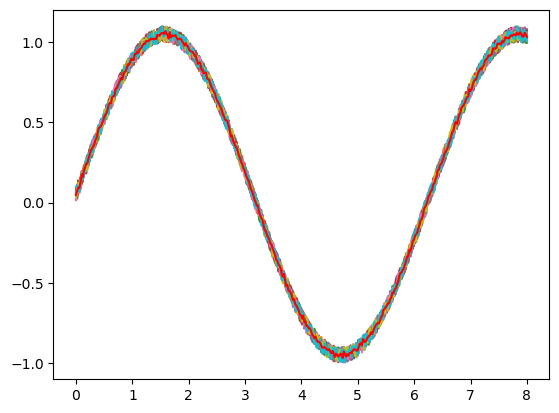

In [4]:
x=np.linspace(0,8,400)
y0=np.sin(x)
nsamples=10
X=np.zeros((len(x),nsamples))
for j in range(nsamples):
    y=y0+np.random.rand(len(y0))*0.1
    plt.plot(x,y)
    for i in range(len(x)):
        X[i,j]=y[i]


Uec, Sec, VTec = np.linalg.svd(X, full_matrices=False)
print("\nEconomy SVD:")
#print("U matrix:\n", Uec)
print("S values:\n", Sec)
#print("VT matrix:\n", VTec)
r=1
Shat_matrix=np.diag(Sec)
Xapprox = Uec[:,0] * Sec[0] * VTec[0,0]

plt.plot(x,Xapprox,'r-')




In [5]:
#truncation with r terms
n=10; m=7
X=np.random.rand(n,m)
#economy SVD of X
Uec, Sec, VTec=np.linalg.svd(X,full_matrices=False)

r=5

#Slow alternative:
#Uapprox=np.zeros((n,r))
#for i in range(n):
#    for j in range(r):
#        Uapprox[i,j]=Uec[i,j]
# or faster alternative
Uapprox=Uec[:,:r]
#print('Ua=',Uapprox)

#Slow alternative
#Xapprox=np.zeros((n,m))
#Si ui*viT where ui is column i in U and vi is row i in VT
#for i in range(r):
#    Xapprox=Xapprox1+Sec[i]*np.einsum('k,l',Uapprox[:,i],VTec[i,:])

# faster alternative
Shat_matrix=np.diag(Sec)
Xapprox = Uec[:,0:r] @ Shat_matrix[0:r,0:r] @ VTec[0:r,:]

print(Xapprox-X)
print(np.linalg.norm(X-Xapprox,2))




[[ 0.05160616  0.04665371  0.04450359 -0.20511241 -0.10086598  0.10600301
  -0.03776995]
 [ 0.01342756 -0.0537723   0.14151012  0.03382857  0.13207554 -0.09485507
  -0.16697259]
 [ 0.02383826  0.00438907  0.05438783 -0.07204303 -0.00537037  0.01708649
  -0.05836331]
 [-0.02698719  0.03539683 -0.14114491  0.02815779 -0.09087938  0.05563946
   0.16231238]
 [ 0.04393847 -0.03662059  0.18838474 -0.07363929  0.09749684 -0.05156021
  -0.21417311]
 [-0.02624446 -0.00546949 -0.05862118  0.08015819  0.00744347 -0.01999519
   0.06273477]
 [-0.02957679  0.00468294 -0.08744692  0.07598618 -0.01766588 -0.0023849
   0.09656147]
 [-0.02726908  0.01327825 -0.09828812  0.05820284 -0.03781129  0.01444651
   0.11039135]
 [-0.02803045 -0.00179112 -0.07059537  0.08025441 -0.00177956 -0.01383157
   0.07666137]
 [ 0.00867481  0.02680397 -0.02989812 -0.05956399 -0.06250146  0.05304175
   0.03885921]]
0.5540106083271888


In [6]:
# Read the screenshot image
plt.rcParams['figure.figsize'] = [16, 8]  # Set plot figure size
filename = 'DATA/me.jpg'  # File path of the image
A = imread(filename)  # Read the image

# Convert RGB to grayscale
X = np.mean(A, -1)  # Compute the grayscale image by taking the mean across color channels
print(np.size(X,0))
print(np.size(X,1))
print(np.max(X))
print(np.min(X))



1189
818
255.0
0.0


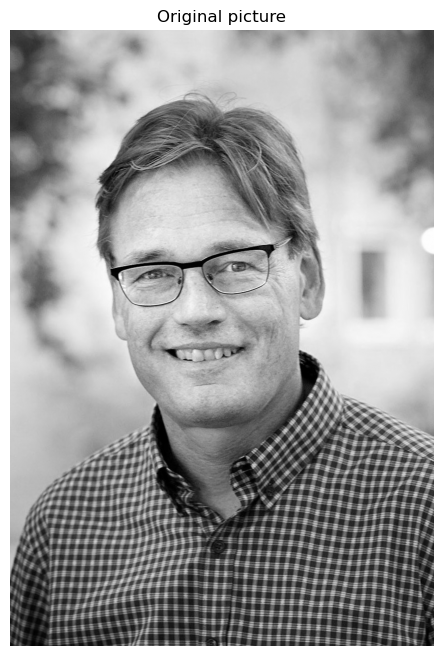

In [7]:
# Display the original image
img = plt.imshow(X)  # Display the grayscale image
img.set_cmap('gray')  # Set colormap to grayscale
plt.axis('off')  # Turn off axis labels
plt.title('Original picture')  # Set the title
plt.show()  # Show the plot

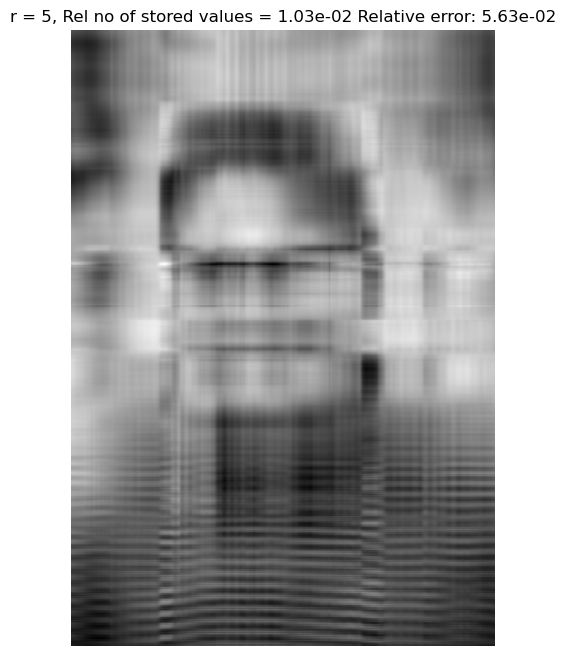

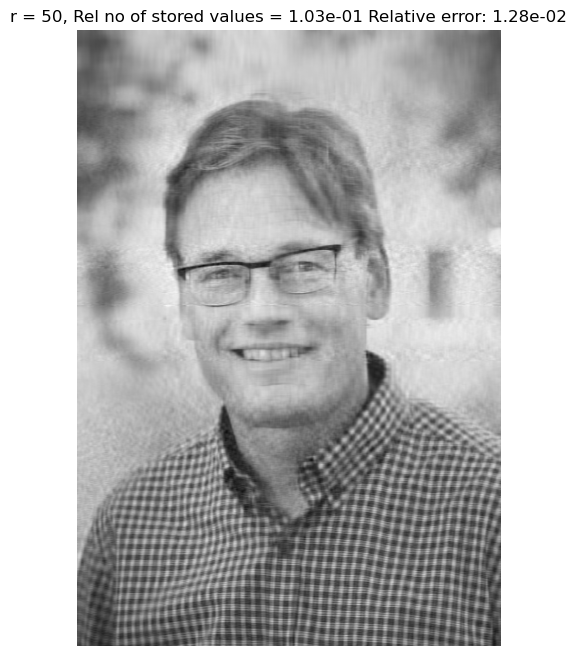

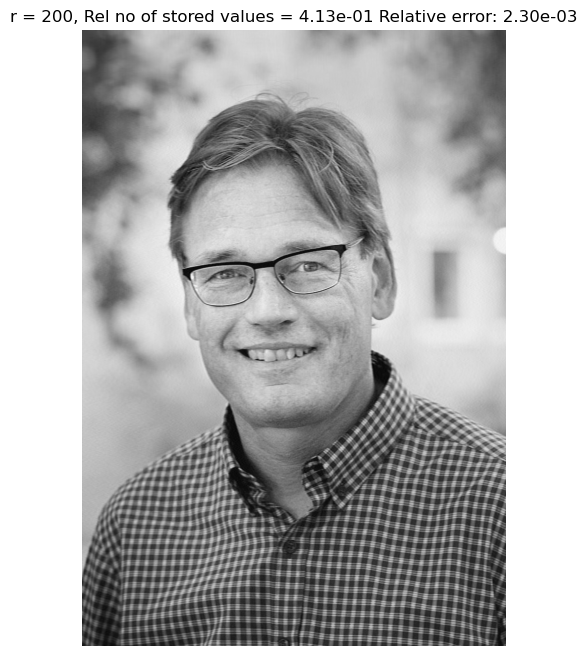

In [8]:
# Perform economy SVD on the grayscale image
U, S, VT = np.linalg.svd(X, full_matrices=False)  # Compute the economy SVD matrices
S = np.diag(S)  # Construct a diagonal matrix from the singular values

# Construct approximate images for different ranks
j = 0
r_vector = [5, 50, 200]  # Different ranks for approximation
rel_no_stored_values = np.zeros(len(r_vector))
rel_error_values = np.zeros(len(r_vector))

for r in r_vector:
    # Compute the approximation using SVD
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    
    # Compute relative number of stored values and relative error
    rel_no_stored_values[j] = (np.size(U, 0) * r + r + r*np.size(VT, 1) ) / (np.size(X, 0) * np.size(X, 1))
    rel_error_values[j] = np.linalg.norm(Xapprox - X, 2) / np.linalg.norm(X, 2)
    
    # Display the approximate image
    plt.figure(j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    value1 = '{:.2e}'.format(rel_no_stored_values[j])
    value2 = '{:.2e}'.format(rel_error_values[j])
    plt.title('r = ' + str(r) + ', Rel no of stored values = ' + str(value1) + ' Relative error: ' + str(value2))
    j += 1
    plt.show()

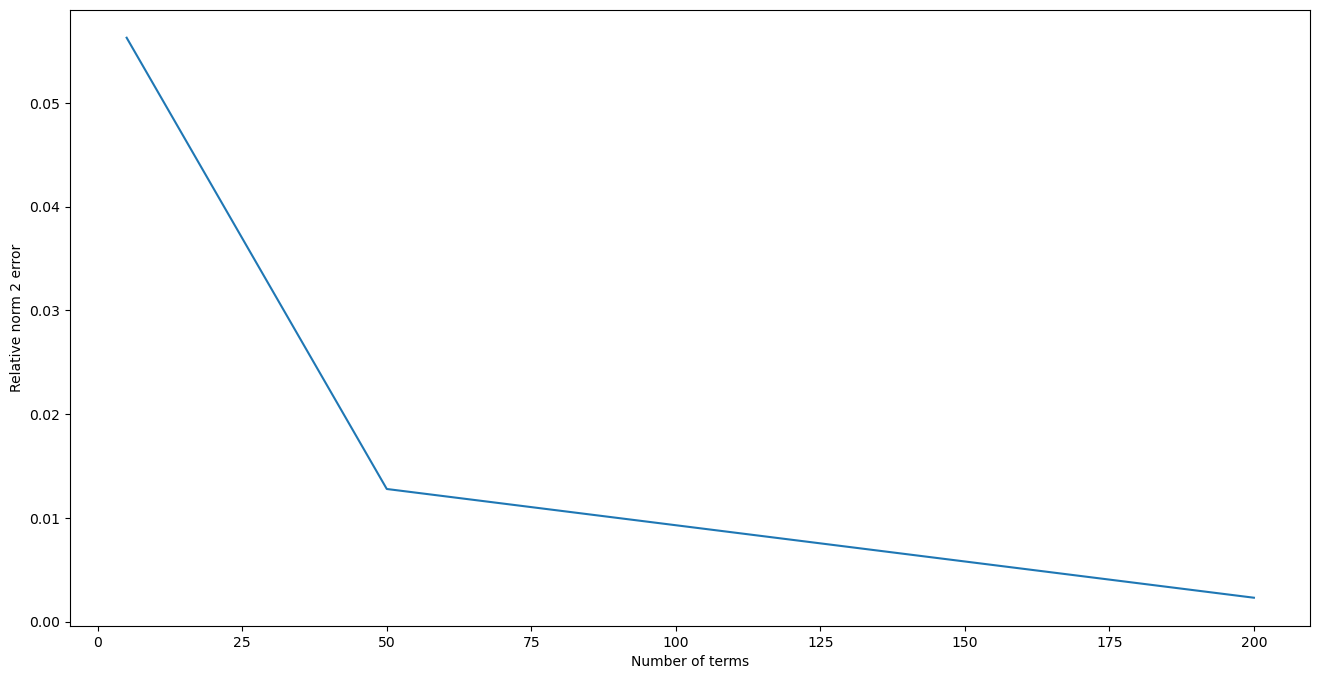

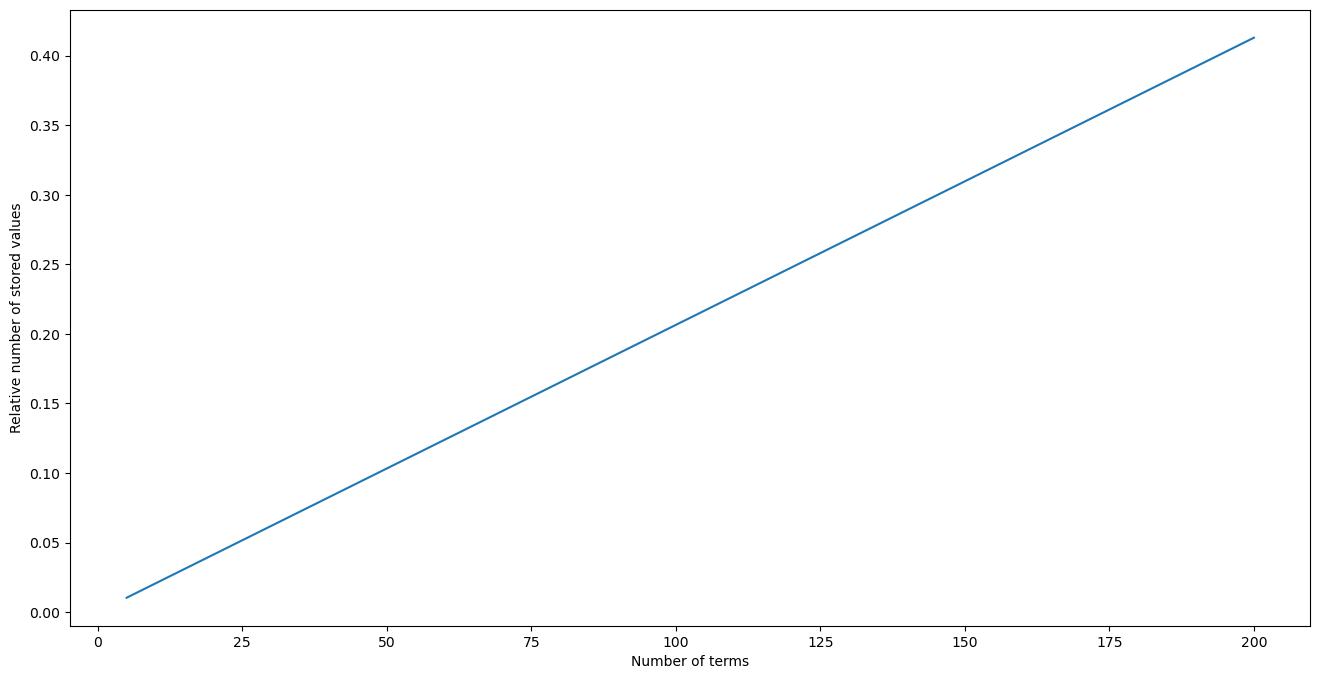

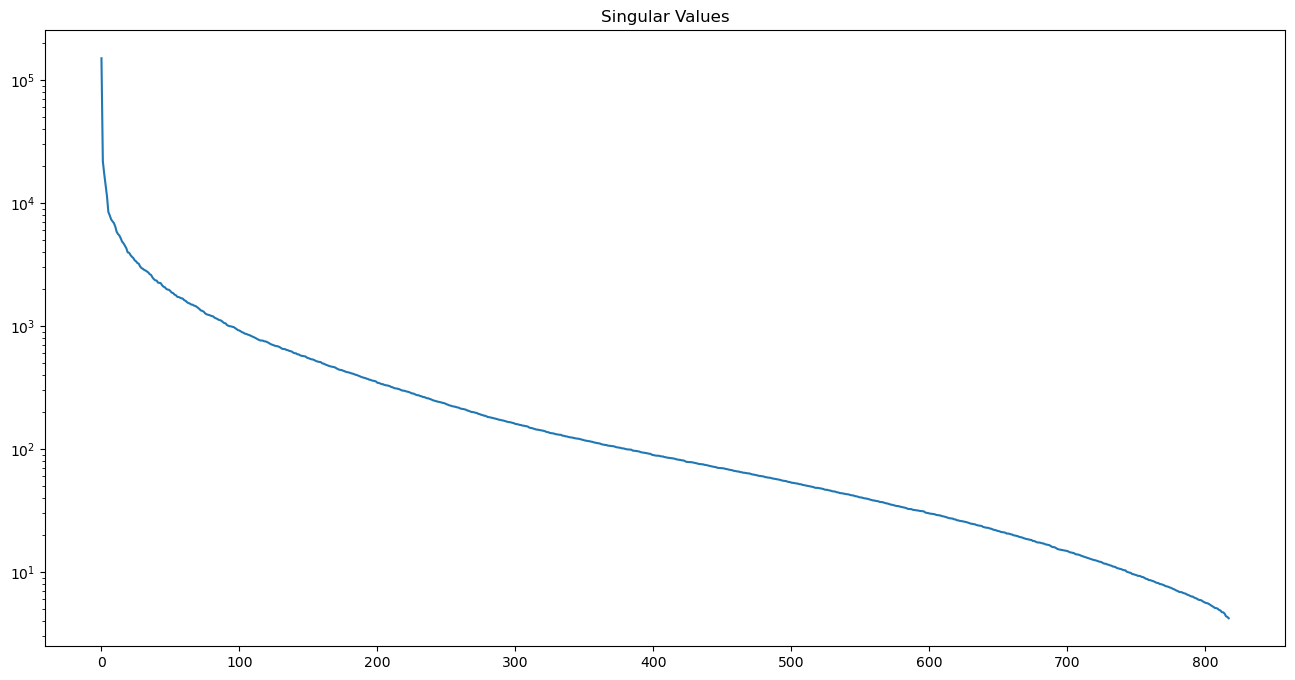

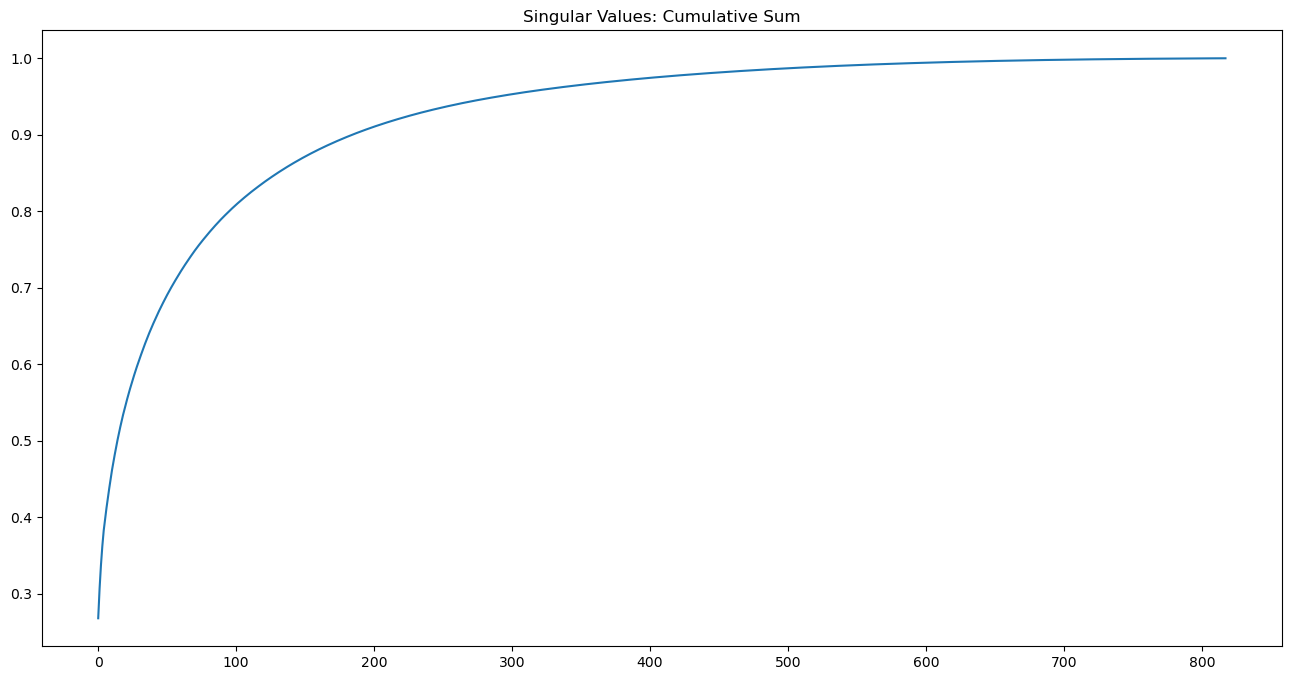

In [9]:
plt.plot(r_vector, rel_error_values)
plt.xlabel('Number of terms')
plt.ylabel('Relative norm 2 error')
plt.show()            
plt.plot(r_vector, rel_no_stored_values)
plt.xlabel('Number of terms')
plt.ylabel('Relative number of stored values')
plt.show()  


## For plotting of singular values and their cumulative sum:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## For overdetermined systems:
Show with a numerical example that result from pseudo-inverse gives lowest value of $||A \,x-b||_2$ 

In [10]:
# overdetermined system, more equations than unknowns, more rows than columns
b=np.array([1.,1.5,2])
A=np.array([[1.,2.],[1.1,2.1],[1.2,2.2]])

#find x that minimizes
def obj_fcn(x):
    return np.linalg.norm(A@x-b,2)


x0=np.array([6.,2.])
print('start',obj_fcn(x0))

#use nonlinear optimization (more details next week ...)
from scipy.optimize import minimize
res = minimize(obj_fcn, x0, method='nelder-mead',
               options={'xatol': 1e-6, 'disp': True})

print(res.x,obj_fcn(res.x))

#result from pseudo inverse:
xtilde=np.linalg.pinv(A) @ b
print('xtilde=',xtilde)

print('difference=',res.x-xtilde)


start 16.11365880239494
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 78
         Function evaluations: 148
[ 9.00000013 -4.00000007] 1.597914069206804e-08
xtilde= [ 9. -4.]
difference= [ 1.28999114e-07 -7.13492341e-08]


## For underdetermined systems:
Show with a numerical example that result from pseudo-inverse gives lowest value of $||x||_2$ that fulfills $Ax=b$ 

In [11]:
# Example 1, underdetermined system, less equations than unknowns, less rows than columns
A=np.array([[3,1]])
b=np.array([2])
x=np.linalg.pinv(A) @ b
print('x= ',x)

x=  [0.6 0.2]


In [12]:
# Example 2

# underdetermined system, less equations than unknowns, less rows than columns
b=np.array([1.,1.5])
A=np.array([[1.,2.,3.],[1.1,2.1,3.1]])


#find x that minimizes
def obj_fcn(x):
    return np.linalg.norm(x,2)
x0=np.array([6.,2.,3.])
print('start',obj_fcn(x0))

#use nonlinear optimization 
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(A, b, b)
from scipy.optimize import minimize
res = minimize(obj_fcn, x0, method='trust-constr', constraints=[linear_constraint],
               options={'verbose': 1})
print(res.x,obj_fcn(res.x))

#result from pseudo inverse:
xtilde=np.linalg.pinv(A) @ b
print('xtilde=',xtilde)

print('difference=',res.x-xtilde)

start 7.0
`gtol` termination condition is satisfied.
Number of iterations: 6, function evaluations: 24, CG iterations: 5, optimality: 2.77e-09, constraint violation: 1.11e-15, execution time: 0.018 s.
[ 6.16666667  1.66666665 -2.83333333] 6.988085097745533
xtilde= [ 6.16666667  1.66666667 -2.83333333]
difference= [ 8.18778734e-09 -1.63755032e-08  8.18773715e-09]


### Example linear regression

A line is given as $b=x \, a$ where $x$ is the slope. If some random noise is added to  $b$ in some points. Solve for the best slope that fits this disturbed data. 

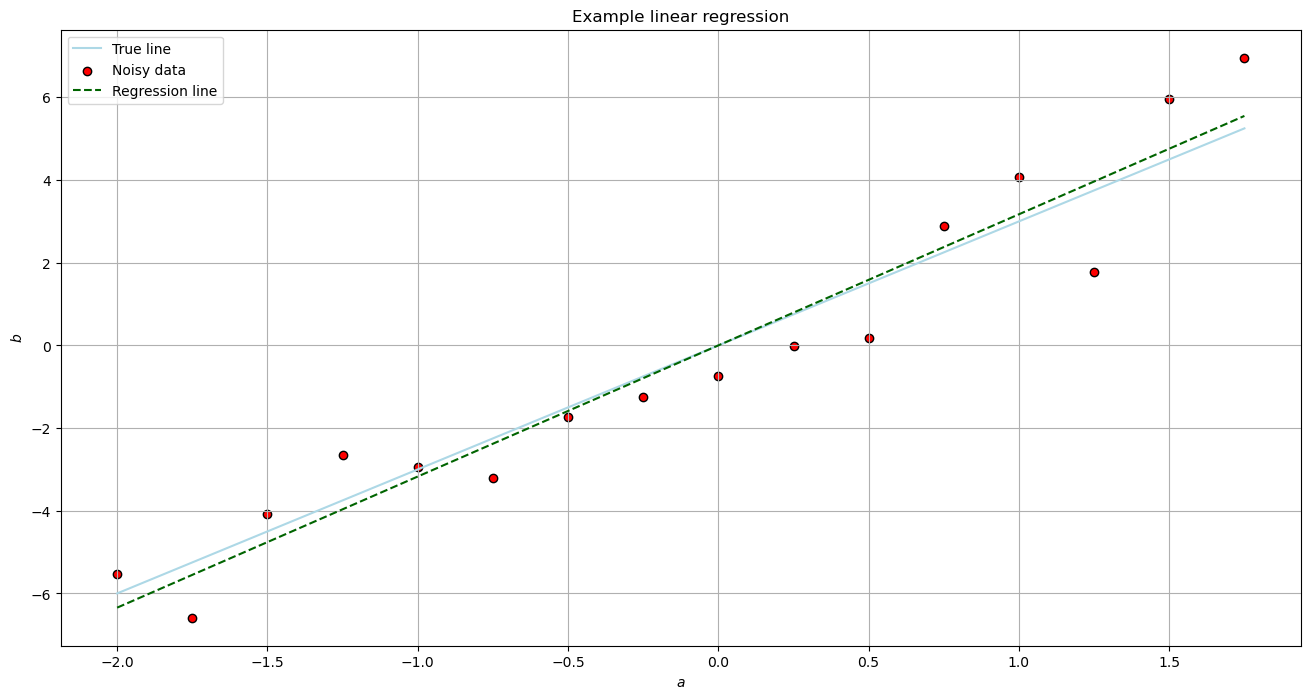

In [13]:
x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1) #changes to a column from a row
b = x*a + np.random.randn(np.size(a,0),np.size(a,1)) # Add noise to data, normal (Gaussian) distribution with mean 0 and variance 1
U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit
#alternative: xtilde2 = np.linalg.pinv(a) @ b


# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Add Labels to the Axis
ax.set_xlabel(r'$a$')    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_ylabel(r'$b$')
ax.set_title('Example linear regression')
# Background grid
ax.grid(visible=True)

# plot 
ax.plot(a, x*a, label='True line', linestyle='-', color='lightblue')
ax.scatter(a, b, label='Noisy data', marker='o', facecolors='red', edgecolors='black')
ax.plot(a, xtilde*a, label='Regression line', linestyle='--', color='darkgreen')
ax.legend(loc='best')


### Example of information in SVD matrices

In [14]:
# Define the clamped beam displacement function
def w_clamped_beam(x, q0, L, Emod, I):
    return q0 * x**2 * (10 * L**2 * (2 * L - x) + x**3) / (120 * Emod * I * L)

# Define constants and parameters
L = 1000
Emod = 210 * 10**3
I = 20**4 / 12
x = np.linspace(0, L, 100)  # Spatial positions
time = np.linspace(0, np.pi * 2., 100)  # Time values
q0 = 1. * np.sin(time)  # Time-dependent load

print("Number of time steps:", len(q0))

X = np.zeros((len(x), len(time)))  # Create a matrix to store the data

# Fill the data matrix using the clamped beam function
for i in range(len(x)):
    for j in range(len(q0)):
        X[i, j] = w_clamped_beam(x[i], q0[j], L, Emod, I)

# Perform economy SVD on the data matrix
Uhat, Shat, VhatT = np.linalg.svd(X, full_matrices=False)

print("Singular values:", Shat)



Number of time steps: 100
Singular values: [1.16191041e+03 6.48932750e-13 5.73317423e-13 5.27247382e-13
 4.95739051e-13 4.73874045e-13 4.49735828e-13 4.10566359e-13
 3.59669866e-13 3.12025082e-13 2.62295421e-13 2.11141851e-13
 1.48152038e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e-13 1.16093455e-13
 1.16093455e-13 1.16093455e-13 1.16093455e

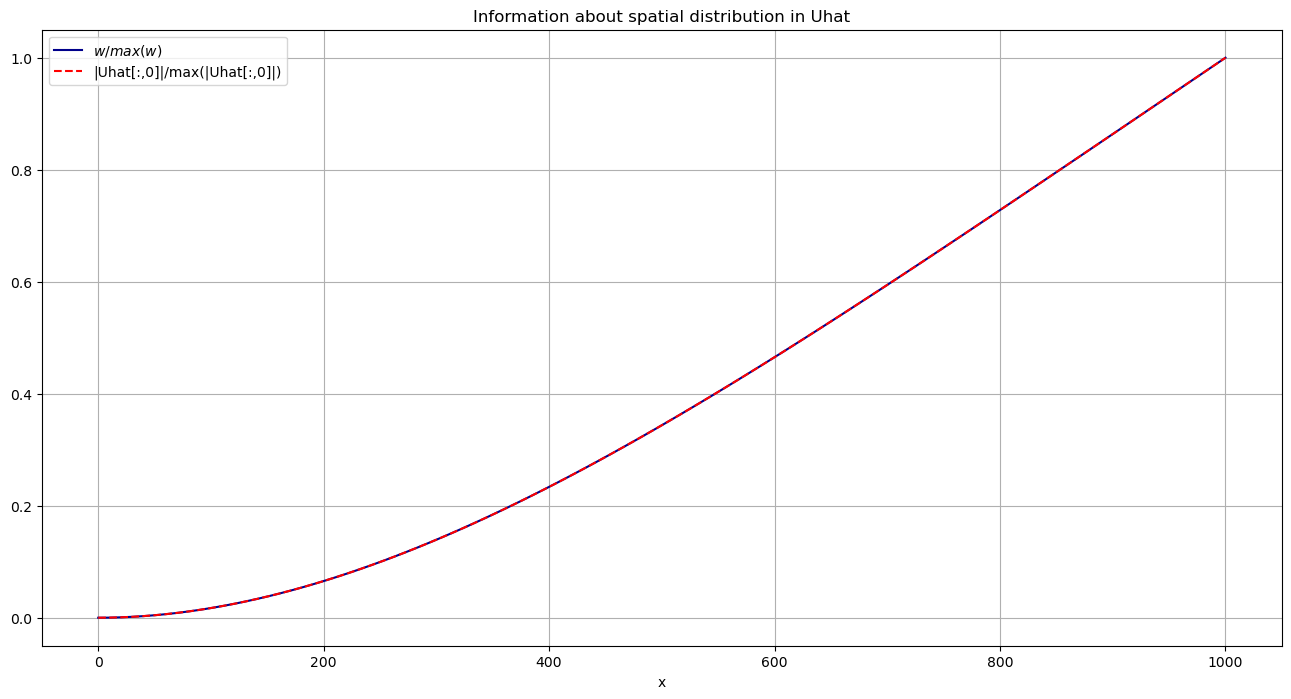

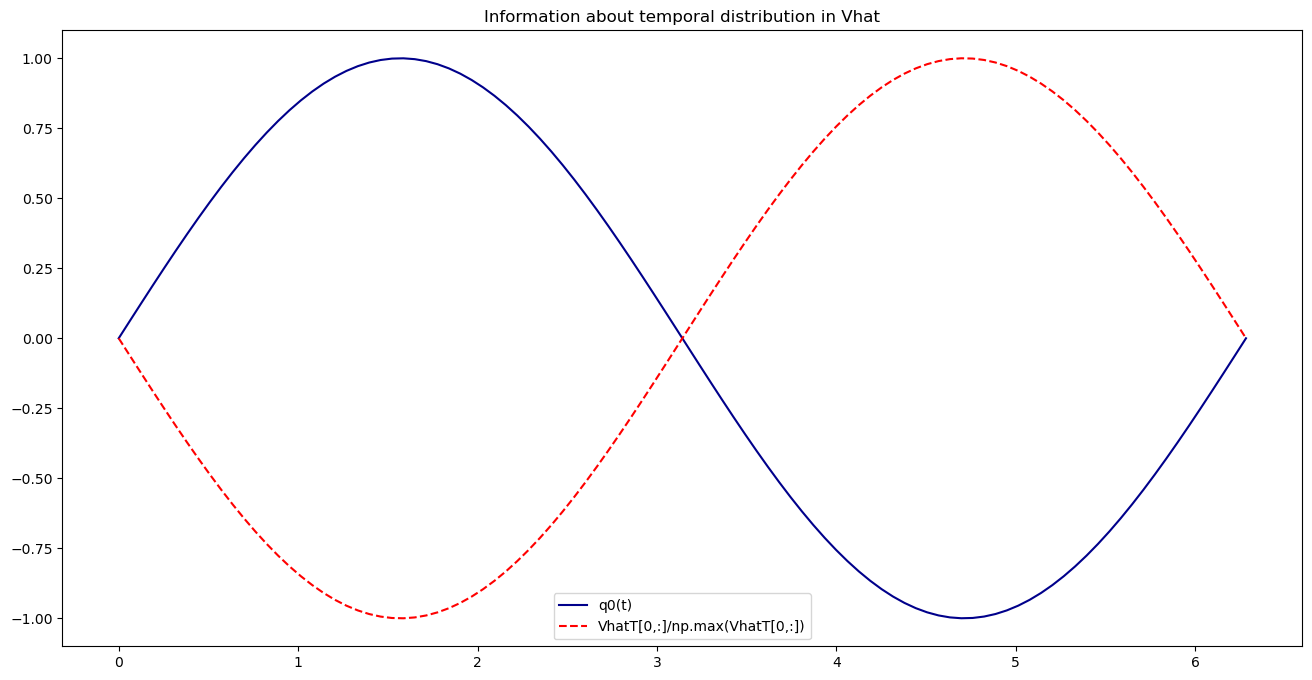

In [15]:
# Create a figure for spatial distribution visualization
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel('x', fontsize=10)
ax.set_title('Information about spatial distribution in Uhat')
ax.grid(visible=True)

# Plot the spatial distribution of the data and the first singular vector
ax.plot(x, X[:, 1] / np.max(X[:, 1]), label='$w/max(w)$', linestyle='-', color='darkblue')
ax.plot(x, np.abs(Uhat[:, 0]) / np.max(np.abs(Uhat[:, 0])), label='|Uhat[:,0]|/max(|Uhat[:,0]|)', linestyle='--', color='red')
ax.legend(loc='best')

# Create a figure for temporal distribution visualization
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(time, q0, label='q0(t)', linestyle='-', color='darkblue')
ax.plot(time, VhatT[0, :] / np.max(VhatT[0, :]), label='VhatT[0,:]/np.max(VhatT[0,:])', linestyle='--', color='red')
ax.set_title('Information about temporal distribution in Vhat')
ax.legend(loc='best')

# Show the plots
plt.show()


## Transient vibration in a bar. Snapshots of displacement vs x coordinate collected in matrix X in 

In [42]:
import scipy.io as sio
mat_file=sio.loadmat('DATA/bar_vibration_data.mat')
X=mat_file['X'] # snapshots 
X.shape

(200, 1000)

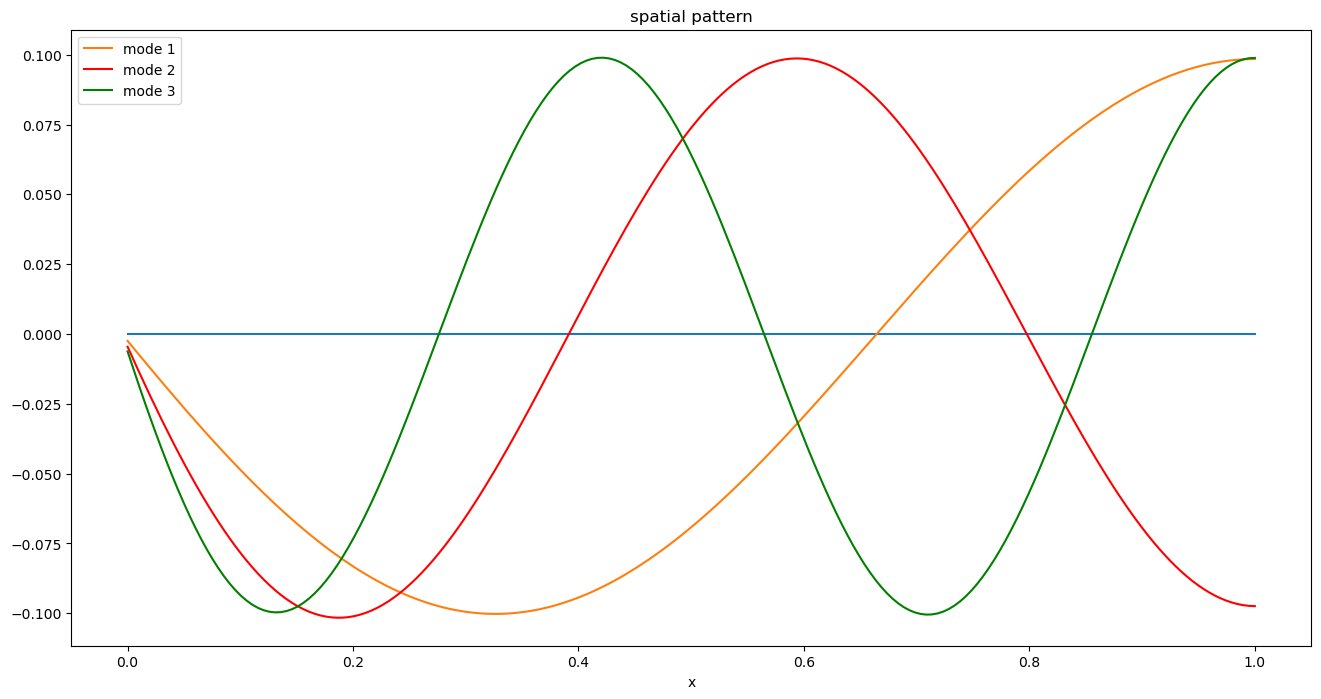

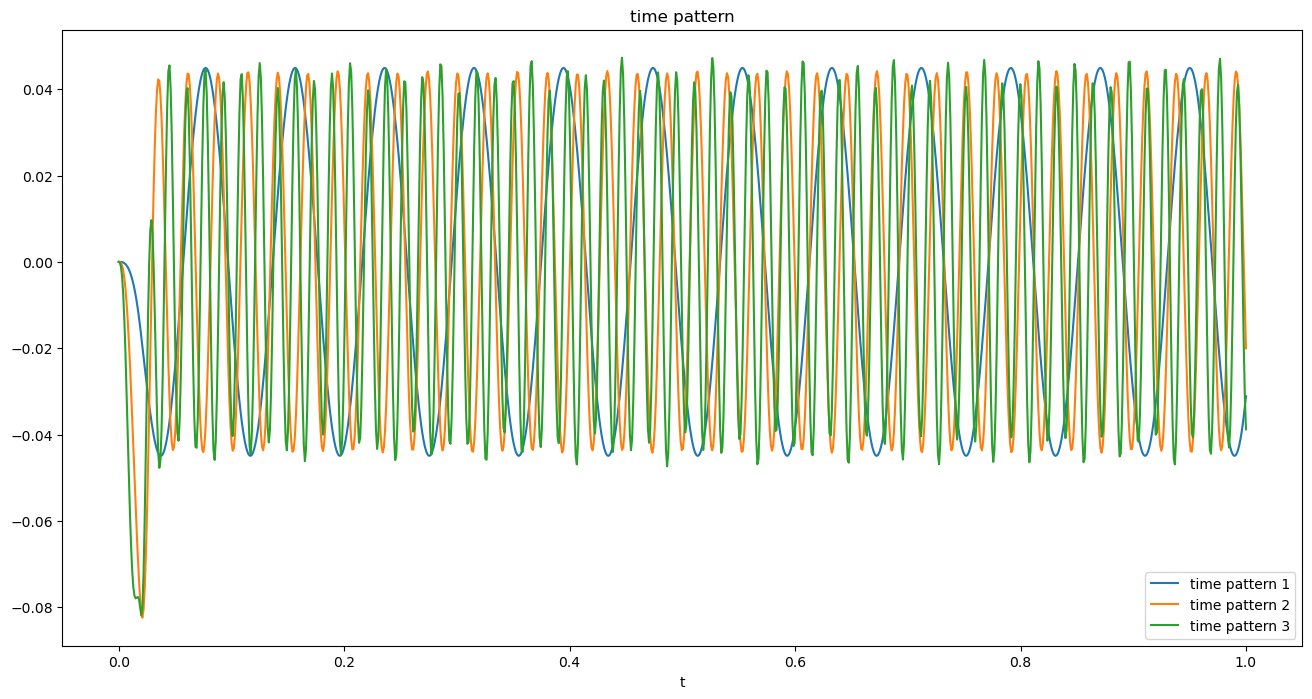

In [43]:
x=np.linspace(0,1,200)
t=np.linspace(0,1,1000)
#plot snapshot of diplacement field
plt.plot(x,X[:,-1])

Uec, Sec, VTec = np.linalg.svd(X, full_matrices=False)

plt.plot(x,Uec[:,1],label='mode 1')
plt.plot(x,Uec[:,2],label='mode 2',color='r')
plt.plot(x,Uec[:,3],label='mode 3',color='g')
plt.title('spatial pattern')
plt.xlabel('x')
plt.legend()
plt.show()

#%%
plt.plot(t,VTec[0,:],label='time pattern 1')
plt.plot(t,VTec[1,:],label='time pattern 2')
plt.plot(t,VTec[2,:],label='time pattern 3')
plt.title('time pattern')
plt.xlabel('t')
plt.legend()
plt.show()

### PCA


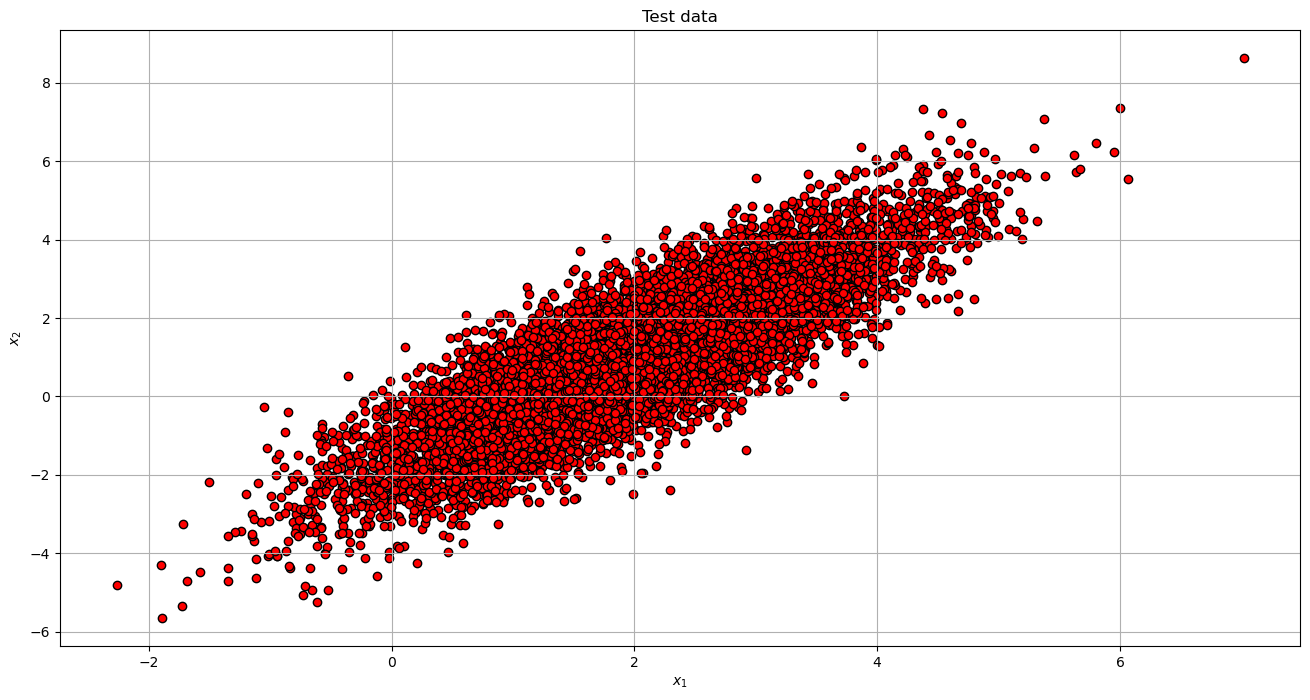

In [16]:
#create artificial test datas
xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Add Labels to the Axis
ax.set_xlabel(r'$x_1$')    
ax.set_ylabel(r'$x_2$')
ax.set_title('Test data')
# Background grid
ax.grid(visible=True)

# plot 
ax.scatter(X[0,:], X[1,:], label='Noisy data', marker='o', facecolors='red', edgecolors='black')


In [17]:
print('number of snapshots = ',np.size(X,1)) #columns
print('number of spatial points = ',np.size(X,0)) #rows

X=X.T
print('Change to X according to PCA section in the book',X.shape)
 

number of snapshots =  10000
number of spatial points =  2
Change to X according to PCA section in the book (10000, 2)


In [22]:
nPoints=np.size(X,0)
#compute mean of all snapshots (columns)
Xavg =np.zeros(np.size(X,1))
for i in range(nPoints):
    Xavg=Xavg+X[i,:]
Xavg=Xavg/nPoints

print(Xavg.shape)
print(X.shape)
print(nPoints)

(2,)
(10000, 2)
10000


In [23]:

#mean subtract data, now follow the book that snapshots should have been in rows
B=np.zeros((np.size(X,0),np.size(X,1)))
for i in range(np.size(B,0)):
    for j in range(np.size(B,1)):
        B[i,j]=X[i,j]-Xavg[j]  
print(B.shape)

(10000, 2)


In [24]:

#Covariance matrix
C=B.T @ B/(np.size(B,0)-1)
print('C shape=',C.shape)


C shape= (2, 2)


In [25]:

#compute eigenvectors of C
la, n=np.linalg.eig(C)
print(C)
print('eigenvalues',la)
print('eigenvector 1',n[:,0])
print('eigenvector 2',n[:,1])


[[1.19017085 1.62269722]
 [1.62269722 3.06919891]]
eigenvalues [0.25462944 4.00474031]
eigenvector 1 [-0.86633115  0.49947005]
eigenvector 2 [-0.49947005 -0.86633115]


In [ ]:


#alternative use SVD, then we get the eigenvectors in correct order
Uec, Sec, VTec=np.linalg.svd(B,full_matrices=False)
print('First column in Vec: ',VTec[0,:])
print('Second column in Vec: ',VTec[1,:])
print('Singular values: ',Sec)
print('shape of VTec: ',VTec.shape)
#eigenvalues of C can be computed from the singular values of B as
print(Sec*Sec/(nPoints-1))

First column in Vec:  [-0.49947005 -0.86633115]
Second column in Vec:  [ 0.86633115 -0.49947005]
Singular values:  [200.10846654  50.4582975 ]
shape of VTec:  (2, 2)
[4.00474031 0.25462944]


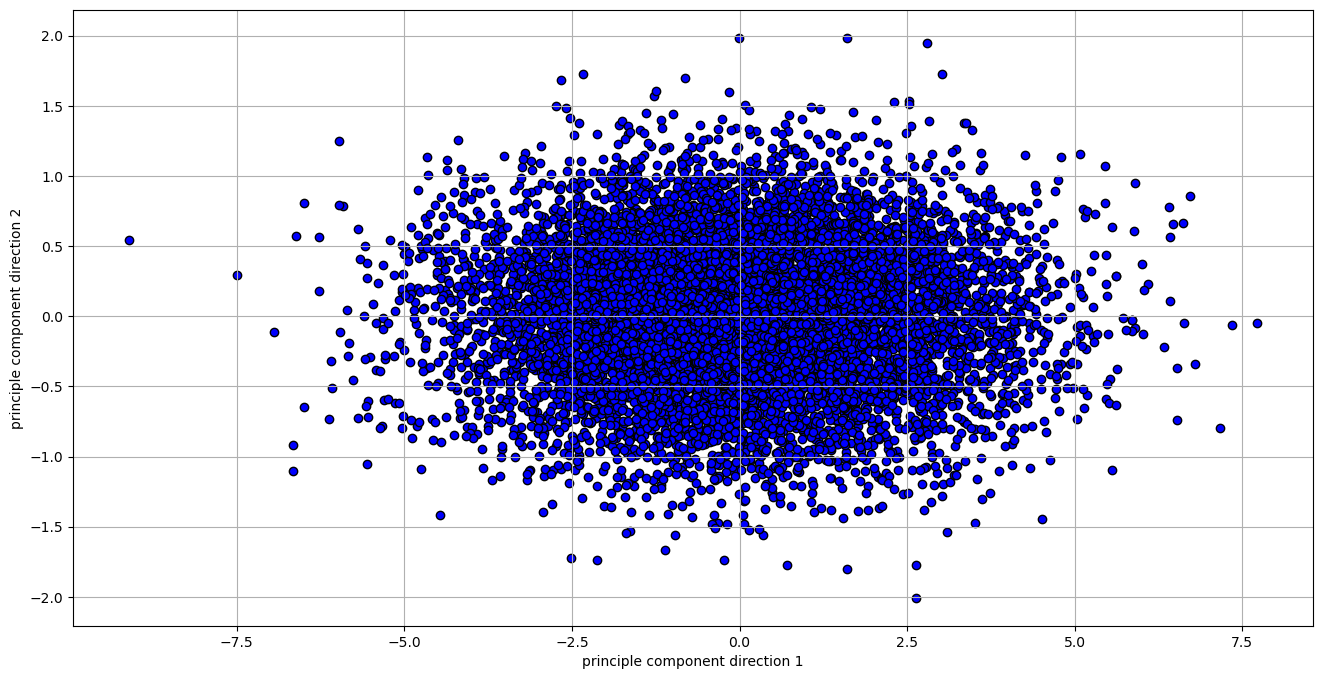

In [29]:


#Principal components can now be ontained from projecting snapshots in base vectors
T=np.zeros((nPoints,2))
for i in range(nPoints):
    T[i,:]=B[i,:]@VTec.T  #taking transpose of VTec=Vtranspose

#Now we can plot th data in the new coordinate system
# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Add Labels to the Axis
ax.set_xlabel(r'principle component direction 1')    
#ax.set_ylabel(r'$x_2$')
ax.set_ylabel('principle component direction 2')
# Background grid
ax.grid(visible=True)
# Background grid
ax.grid(visible=True)
# plot 
ax.scatter(T[:,0], T[:,1], label='Noisy data', marker='o', facecolors='blue', edgecolors='black')


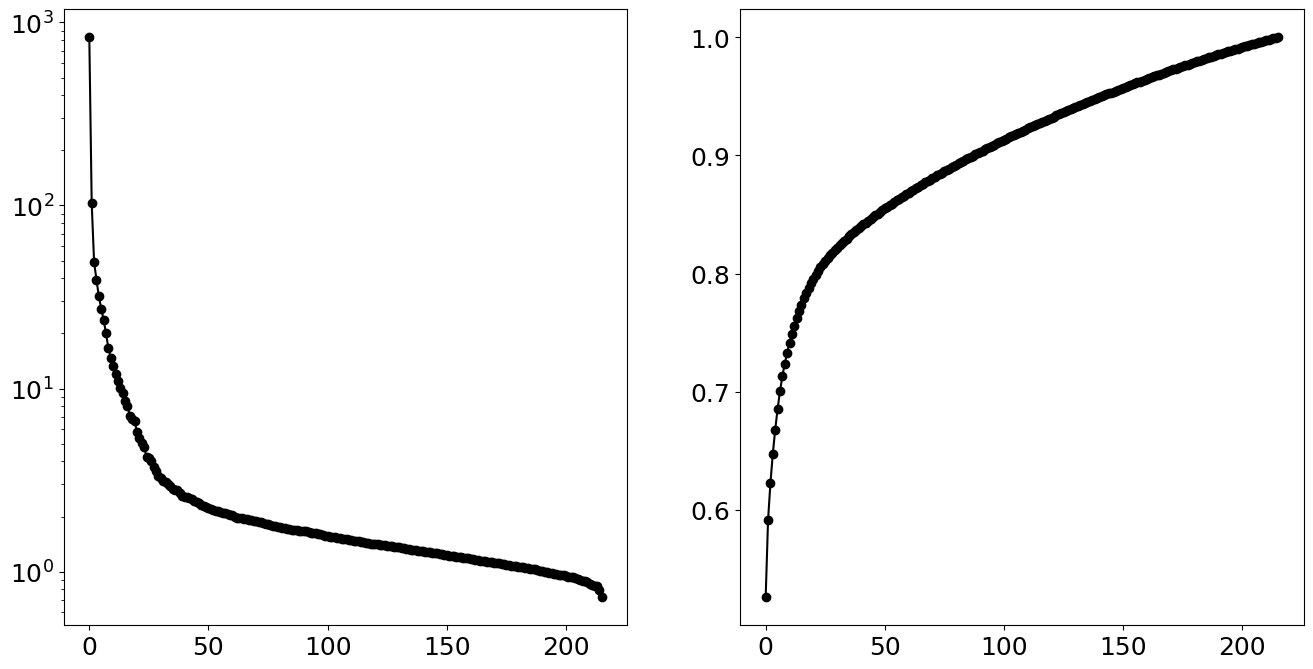

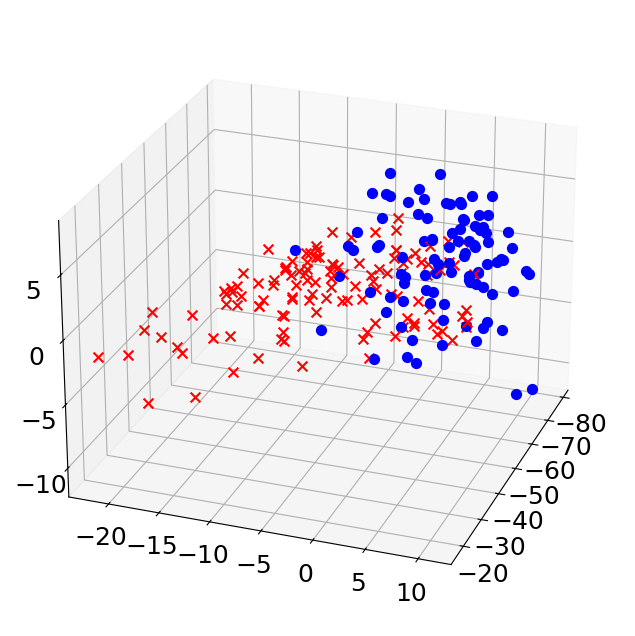

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})


obs = np.loadtxt(os.path.join('DATA','ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()